In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
time_folder = "24-08-12"
base_folder = "/data3/lsf/Pein/Power-Prediction/res_output/"

path = base_folder + time_folder + "_result/" + time_folder + "-joined_metrics.csv"
df = pd.read_csv(path)

# Truncate values larger than 3000 to be 3000
clip_value = 1000
df["train_rmse"] = df["train_rmse"].clip(upper=clip_value)
df["val_rmse"] = df["val_rmse"].clip(upper=clip_value)
df["test_rmse"] = df["test_rmse"].clip(upper=clip_value)

# Display the first few rows of the dataframe
print(df.columns)

# remove those rows where the val_rmse and test_rmse are larger than 1000
# df = df[df["val_rmse"] <= 1000]
# df = df[df["test_rmse"] <= 1000]


Index(['exp_date', 'train_rmse', 'train_custom_acc', 'val_rmse_for_best_train',
       'val_custom_acc_for_best_train', 'test_rmse_for_best_train',
       'test_custom_acc_for_best_train', 'train_epoch_for_best_train',
       'val_rmse', 'val_custom_acc', 'train_rmse_for_best_val',
       'train_custom_acc_for_best_val', 'test_rmse_for_best_val',
       'test_custom_acc_for_best_val', 'val_epoch_for_best_val', 'test_rmse',
       'test_custom_acc', 'train_rmse_for_best_test',
       'train_custom_acc_for_best_test', 'val_rmse_for_best_test',
       'val_custom_acc_for_best_test', 'test_epoch_for_best_test', 'seq_len',
       'lr', 'd', 'hid_d', 'last_d', 'time_d', 'e_layers', 'tok_conv_k',
       'dropout', 'bs', 'norm_type', 'use_pos_enc', 'num_heads',
       'fc_layer_type'],
      dtype='object')


In [23]:
# # Correlation matrix
# corr_matrix = df[
#     [
#         "train_rmse",
#         "val_rmse",
#         "test_rmse",
#         "seq_len",
#         "lr",
#         "d",
#         "hid_d",
#         "last_d",
#         "time_d",
#         "e_layers",
#         "bs",
#     ]
# ].corr()

# # Heatmap of the correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Matrix")
# plt.show()

In [24]:
# # Pairplot to visualize relationships
# sns.pairplot(
#     df[
#         [
#             "train_rmse",
#             "val_rmse",
#             "test_rmse",
#             "seq_len",
#             "lr",
#             "d",
#             "hid_d",
#             "last_d",
#             "time_d",
#             "e_layers",
#             "bs",
#         ]
#     ]
# )
# plt.show()

In [25]:
def plot_rmse_effects(df, x, y=['train_rmse', 'val_rmse', 'test_rmse']):
    for rmse in y:
        fig, axes = plt.subplots(3, 3, figsize=(18, 18))

        for i, feature in enumerate(x):
            row = i // 3
            col = i % 3
            sns.boxplot(ax=axes[row, col], x=feature, y=rmse, data=df)
            for label in axes[row, col].get_xticklabels():
                label.set_rotation(45)
        
        # Adjust layout to make sure plots are not overlapping
        plt.tight_layout()
        plt.show()

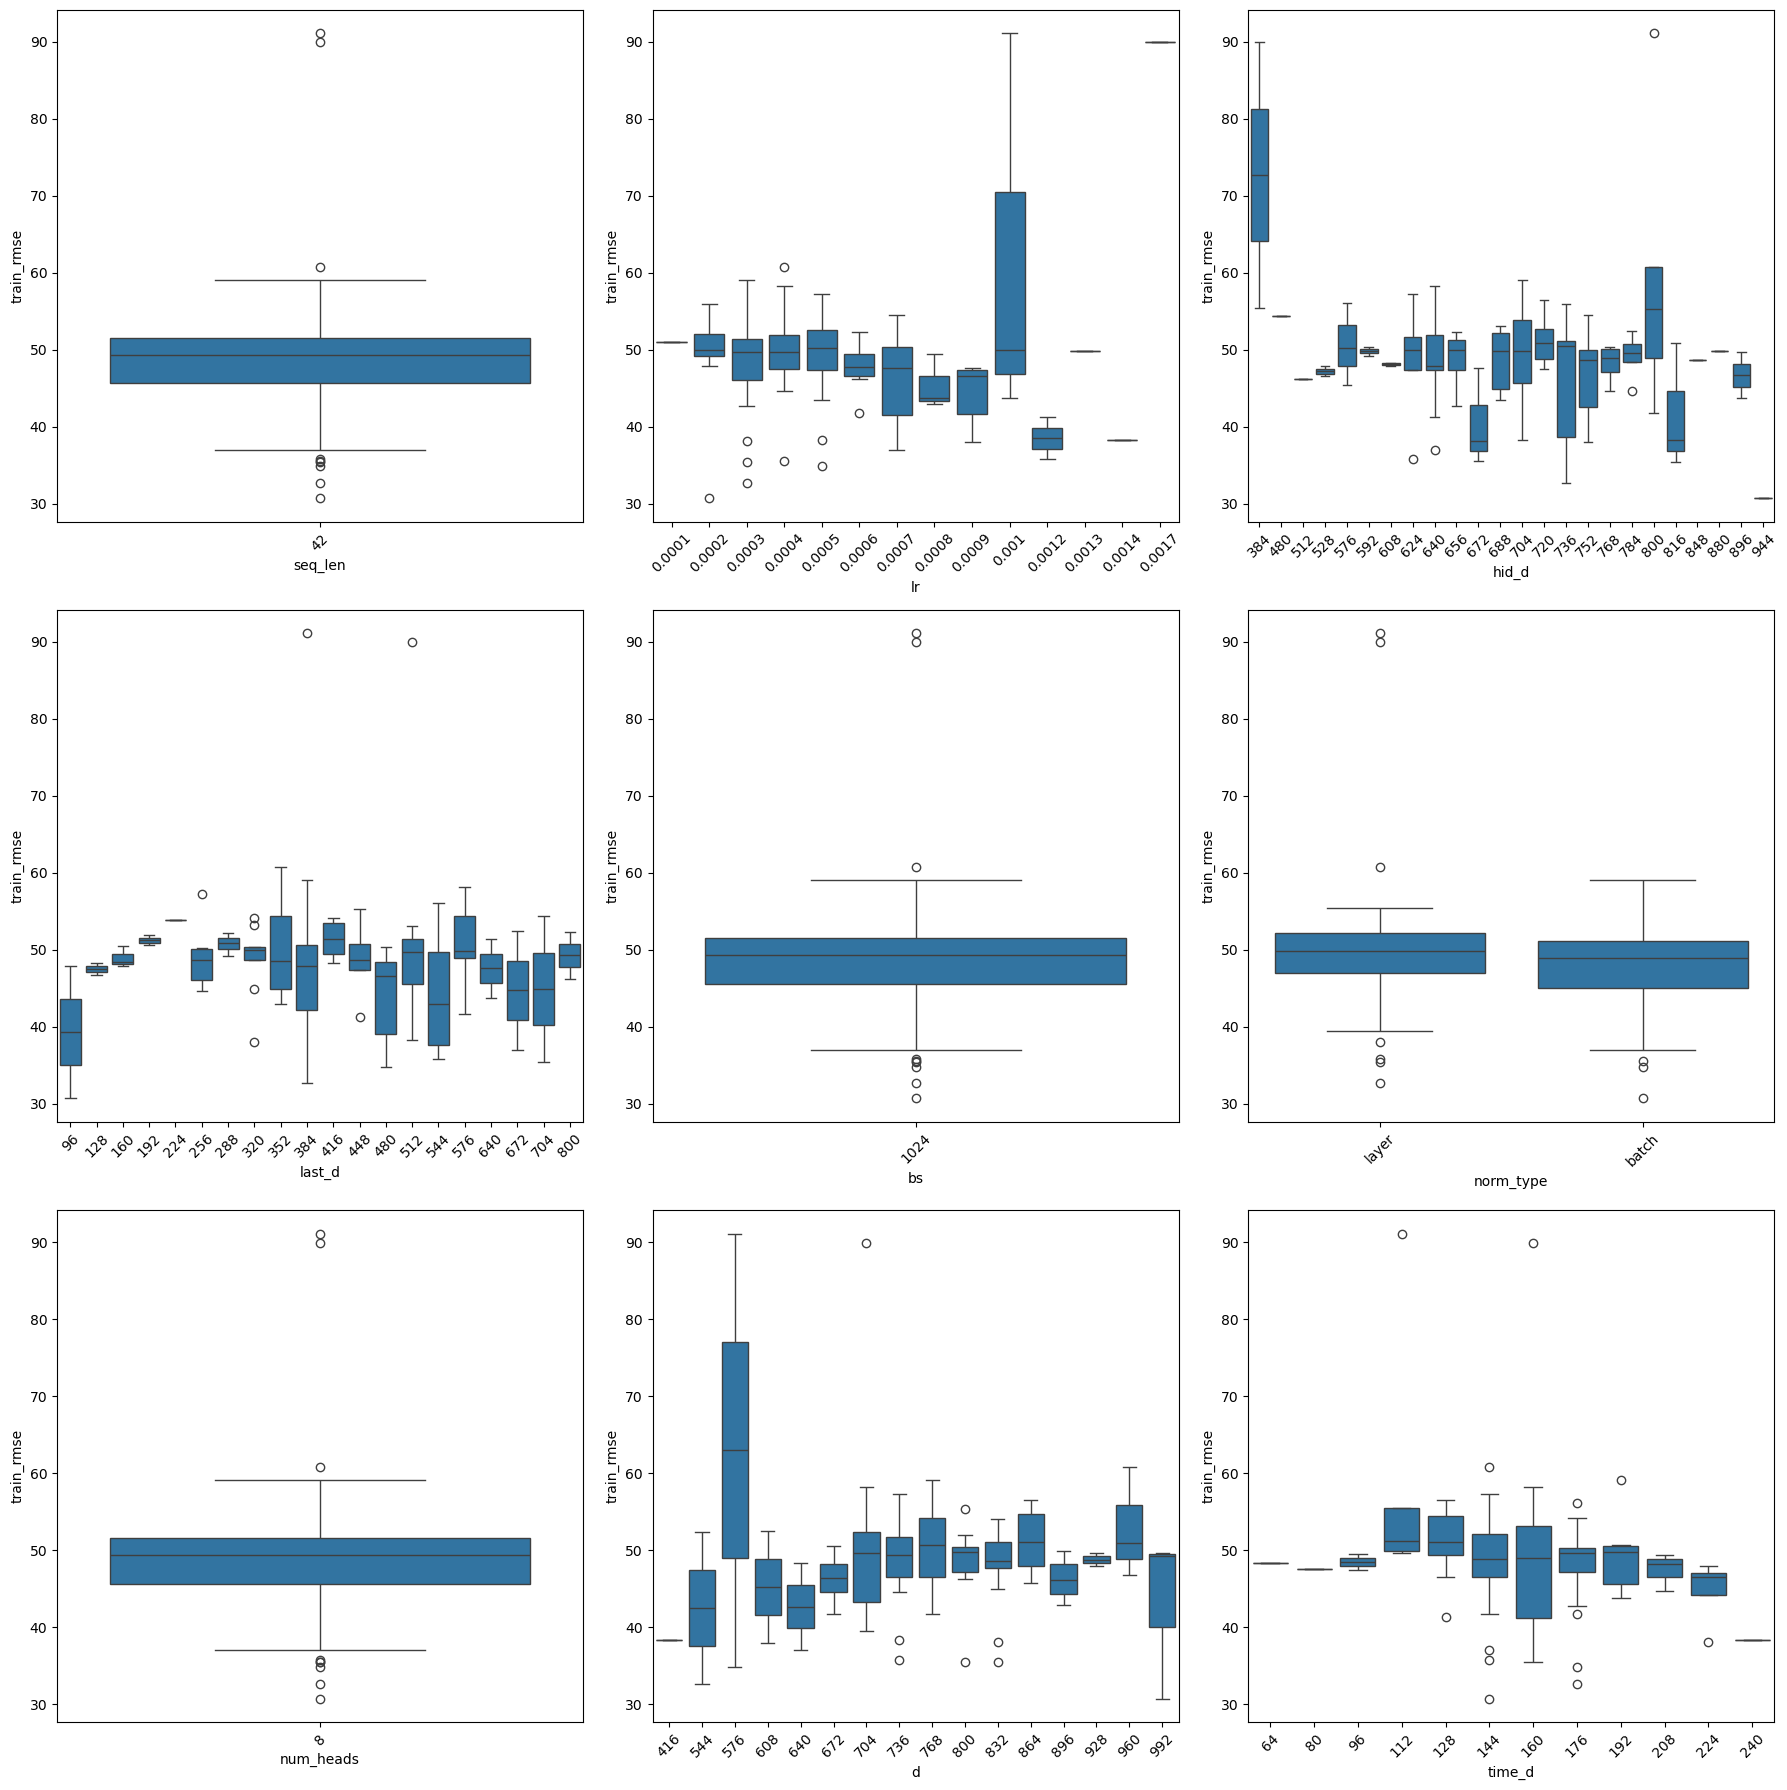

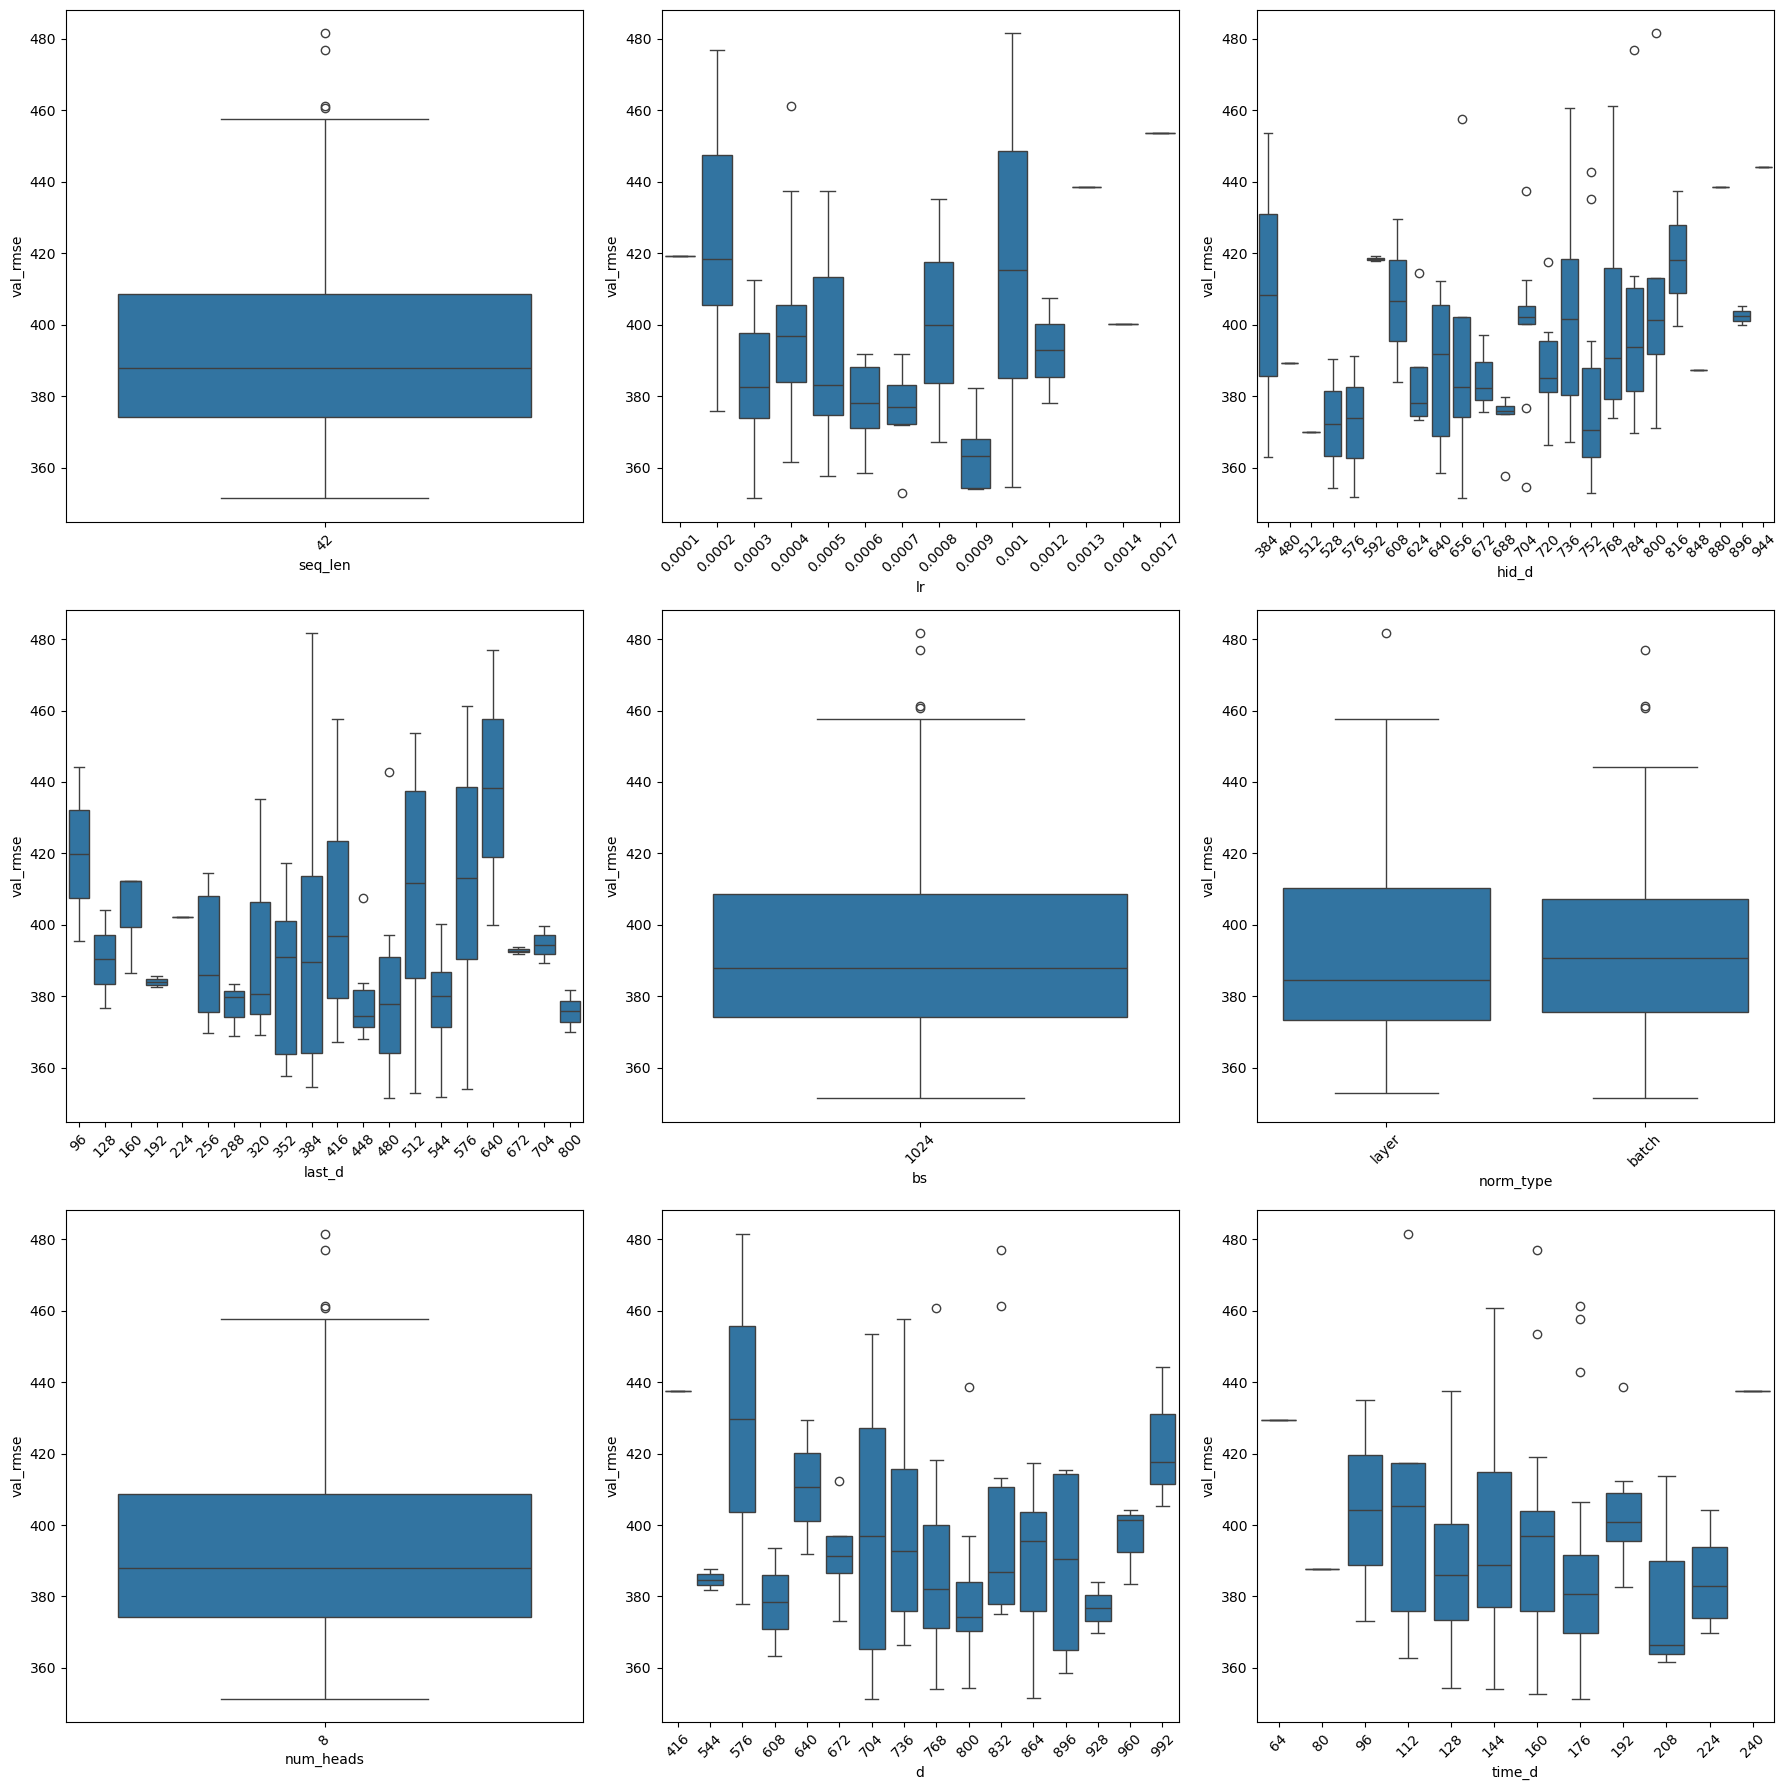

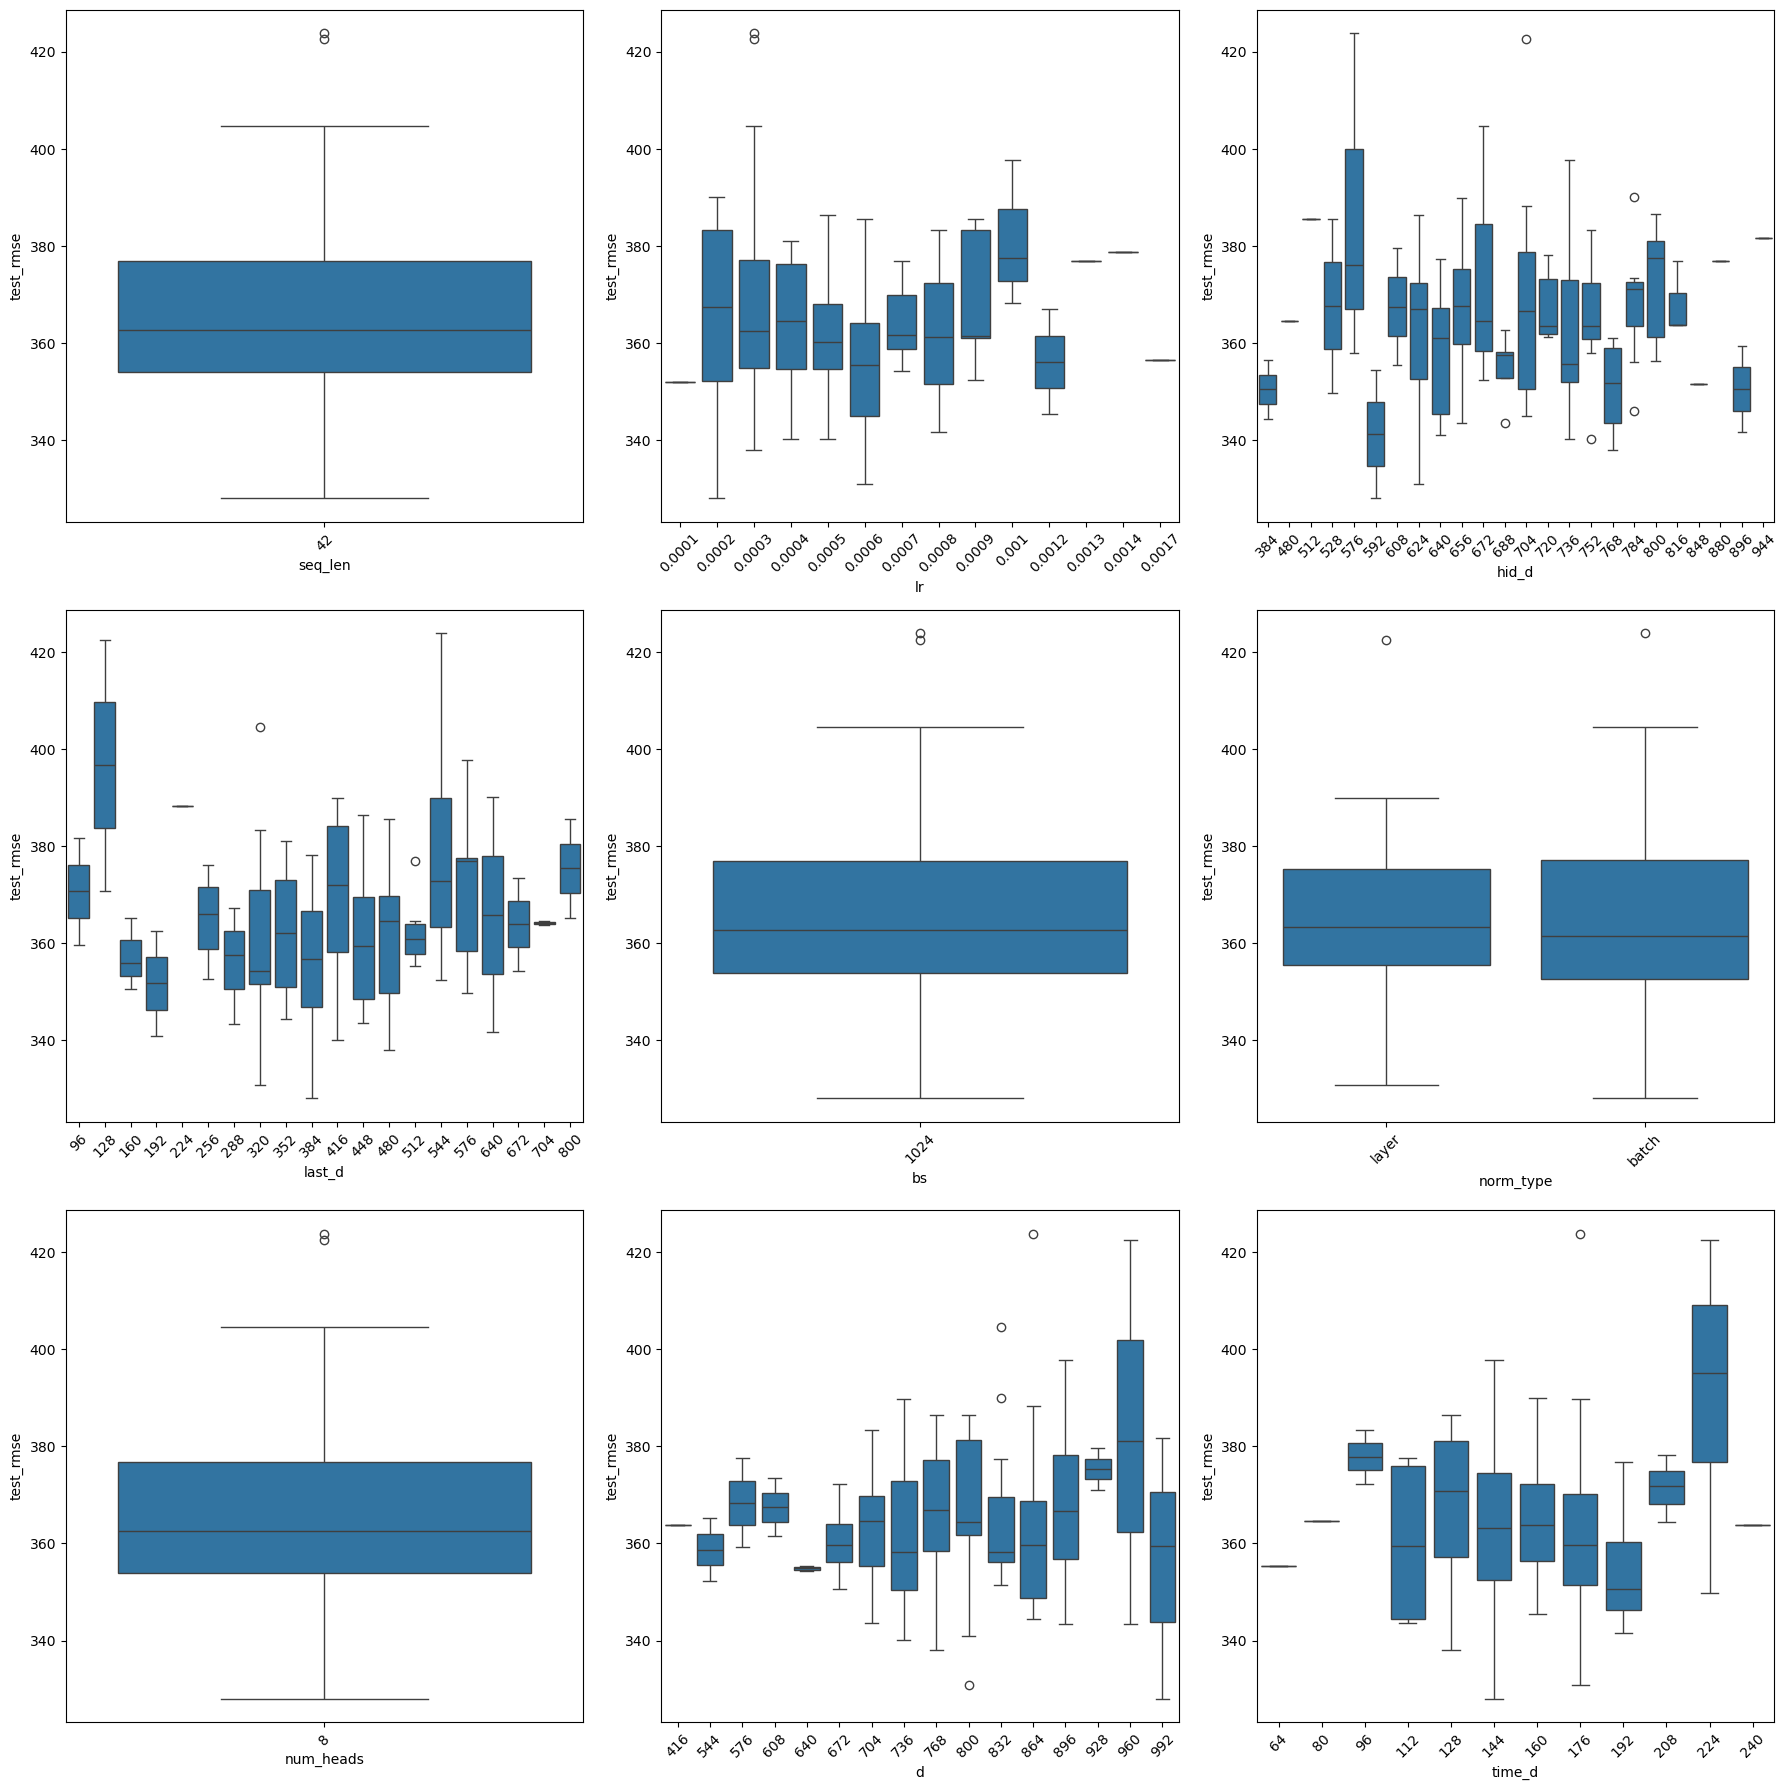

In [37]:
plot_rmse_effects(df, x=["seq_len", "lr", "hid_d", "last_d", "bs","norm_type","num_heads","d",'time_d'])

In [38]:
# Calculate the sum of rmse values for each row

df["sum_rmse"] = 0.01* df["train_rmse"] +0.4* df["val_rmse"] + 0.4* df["test_rmse"]

# Sort the rows based on the sum of rmse values
sorted_df = df.sort_values(by="sum_rmse")


In [39]:
sorted_df

,exp_date,train_rmse,train_custom_acc,val_rmse_for_best_train,val_custom_acc_for_best_train,test_rmse_for_best_train,test_custom_acc_for_best_train,train_epoch_for_best_train,val_rmse,val_custom_acc,...,time_d,e_layers,tok_conv_k,dropout,bs,norm_type,use_pos_enc,num_heads,fc_layer_type,sum_rmse
55,2024-08-12 17:36,47.666910,90.631966,383.82388,44.373642,351.74010,27.530594,29,358.48770,45.783981,...,176,10,8,0.18,1024,layer,True,8,mha,281.229417
85,2024-08-12 16:25,49.935833,90.373154,385.81520,43.073597,362.70883,32.363449,30,374.37274,44.969311,...,176,8,9,0.20,1024,layer,True,8,mha,282.603594
14,2024-08-12 16:12,51.199932,90.017189,369.40988,45.627407,341.49948,36.478588,30,367.09326,44.409016,...,144,8,10,0.24,1024,batch,True,8,mha,283.412071
16,2024-08-12 16:24,55.453960,89.200378,362.80594,41.020885,371.74470,16.990202,29,362.80594,41.020885,...,112,10,9,0.20,1024,layer,True,8,mha,283.450108
93,2024-08-12 19:03,50.394497,90.286491,390.68457,47.023262,394.73590,44.311657,29,373.76190,47.638908,...,128,8,8,0.22,1024,batch,True,8,mha,285.195973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2024-08-12 20:59,46.804653,91.007332,404.63098,31.649763,395.05340,3.690830,30,404.09338,29.008205,...,224,10,9,0.26,1024,layer,True,8,mha,331.138651
56,2024-08-12 19:25,55.956460,89.458290,532.33360,23.278662,382.29364,30.548634,22,460.72888,27.434416,...,144,4,9,0.26,1024,batch,True,8,mha,335.915129
74,2024-08-12 18:30,48.931362,90.688881,439.45517,29.676355,380.15530,22.862934,30,457.64005,26.082010,...,176,8,8,0.22,1024,layer,True,8,mha,339.494198
12,2024-08-12 15:13,91.110350,82.296371,472.73798,34.776127,380.06850,34.970585,17,481.60303,-8.398273,...,112,10,11,0.18,1024,layer,True,8,mha,344.560444


In [40]:

# Print the top rows with the minimal sum of rmse
top_n = 10  # Number of top rows to print


# Drop the specified columns
columns_to_drop = [
    # "train_custom_acc_for_best_val",
    # "train_custom_acc",
    # "val_custom_acc",
    # "test_custom_acc",
    # "train_custom_acc_for_best_test",
    # "val_custom_acc_for_best_train",
    # "val_custom_acc_for_best_test",
    # "test_custom_acc_for_best_train",
    # "test_custom_acc_for_best_val",
]

output = sorted_df.head(top_n).drop(columns=columns_to_drop)



In [41]:

# print last few columns
print(output.iloc[:, -16:])

    test_epoch_for_best_test  seq_len      lr    d  hid_d  last_d  time_d  \
55                        18       42  0.0006  896    640     384     176   
85                         4       42  0.0006  800    624     320     176   
14                        22       42  0.0005  736    736     416     144   
16                        19       42  0.0005  864    384     352     112   
93                        14       42  0.0003  768    768     480     128   
49                        26       42  0.0007  704    752     512     160   
39                        29       42  0.0002  704    688     448     112   
5                         17       42  0.0005  768    688     352     176   
27                        23       42  0.0003  704    656     480     176   
10                        15       42  0.0010  704    704     384     144   

    e_layers  tok_conv_k  dropout    bs norm_type  use_pos_enc  num_heads  \
55        10           8     0.18  1024     layer         True          8  